In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [5]:
df = pd.read_csv("/content/heart_disease_uci.csv")
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [9]:
X = df.drop("num", axis=1)
y = df["num"]

In [11]:
X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [16]:
def train_evaluate(test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42
    )

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    cm = confusion_matrix(y_test, y_pred)

    return acc, prec, rec, f1, cm

In [17]:
acc_70, prec_70, rec_70, f1_70, cm_70 = train_evaluate(0.30)

acc_70, prec_70, rec_70, f1_70

(0.5591397849462365,
 0.5174649723036819,
 0.5591397849462365,
 0.5363730555584432)

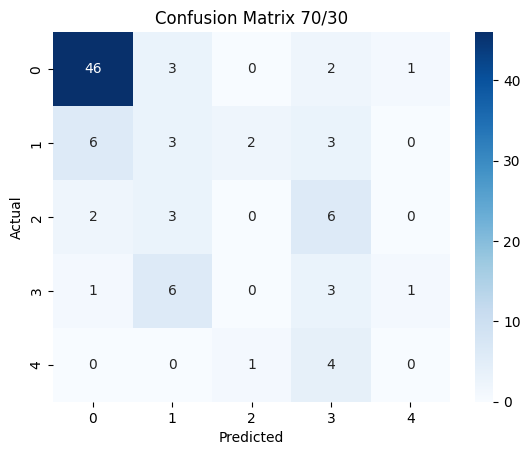

In [18]:
sns.heatmap(cm_70, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix 70/30")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
acc_80, prec_80, rec_80, f1_80, cm_80 = train_evaluate(0.20)

acc_80, prec_80, rec_80, f1_80


(0.532258064516129,
 0.46627028885093397,
 0.532258064516129,
 0.49480940188713574)

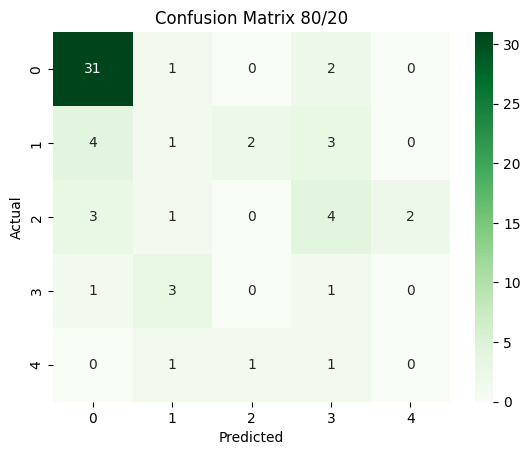

In [20]:
sns.heatmap(cm_80, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix 80/20")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
acc_85, prec_85, rec_85, f1_85, cm_85 = train_evaluate(0.15)

acc_85, prec_85, rec_85, f1_85

(0.48936170212765956,
 0.44435351882160395,
 0.48936170212765956,
 0.4643971631205674)

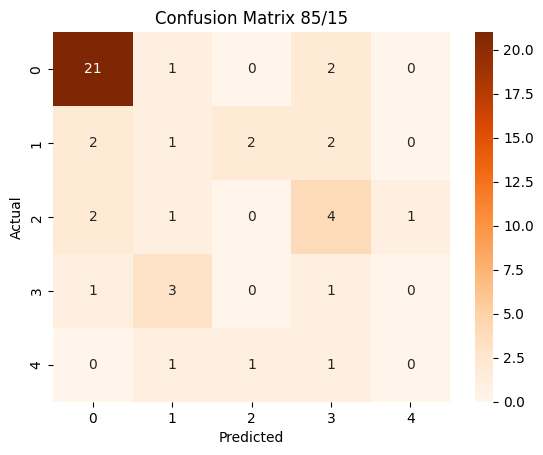

In [22]:
sns.heatmap(cm_85, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix 85/15")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
results = pd.DataFrame({
    "Split": ["70/30", "80/20", "85/15"],
    "Accuracy": [acc_70, acc_80, acc_85],
    "Precision": [prec_70, prec_80, prec_85],
    "Recall": [rec_70, rec_80, rec_85],
    "F1-Score": [f1_70, f1_80, f1_85]
})

results


,Split,Accuracy,Precision,Recall,F1-Score
0,70/30,0.559140,0.517465,0.559140,0.536373
1,80/20,0.532258,0.466270,0.532258,0.494809
2,85/15,0.489362,0.444354,0.489362,0.464397


In [27]:
print("Conclusion:")
print("The 80/20 split gives stable and balanced performance.")
print("The 70/30 split has lower accuracy.")
print("The 85/15 split may overfit due to smaller test data.")


Conclusion:
The 80/20 split gives stable and balanced performance.
The 70/30 split has lower accuracy.
The 85/15 split may overfit due to smaller test data.
